# Read and filter data

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-statements" data-toc-modified-id="Import-statements-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import statements</a></span><ul class="toc-item"><li><span><a href="#Import-scanpy" data-toc-modified-id="Import-scanpy-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import scanpy</a></span></li><li><span><a href="#Import-my-utility-functions-and-import-statements-from-github" data-toc-modified-id="Import-my-utility-functions-and-import-statements-from-github-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Import my utility functions and import statements from github</a></span></li></ul></li><li><span><a href="#Load-inDrops-data-from-GEO" data-toc-modified-id="Load-inDrops-data-from-GEO-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load inDrops data from GEO</a></span></li><li><span><a href="#Filter-on-total-counts-and-fraction-mito" data-toc-modified-id="Filter-on-total-counts-and-fraction-mito-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Filter on total counts and fraction mito</a></span><ul class="toc-item"><li><span><a href="#Select-thresholds" data-toc-modified-id="Select-thresholds-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Select thresholds</a></span></li><li><span><a href="#Apply-the-thesholds-(filter-data)" data-toc-modified-id="Apply-the-thesholds-(filter-data)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Apply the thesholds (filter data)</a></span></li></ul></li><li><span><a href="#Record-in-adata.obs-any-extra-per-cell-information-if-available" data-toc-modified-id="Record-in-adata.obs-any-extra-per-cell-information-if-available-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Record in adata.obs any extra per-cell information if available</a></span></li><li><span><a href="#Save-the-adata-object" data-toc-modified-id="Save-the-adata-object-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Save the adata object</a></span></li></ul></div>

## Import statements

In [1]:
import os,sys
import datetime

### Import scanpy

In [2]:
import scanpy as sc
sc.logging.print_versions()
sc.logging.print_memory_usage()
sc.settings.verbosity = 2

scanpy==1.4.4.post1 anndata==0.6.22.post1 umap==0.3.7 numpy==1.15.4 scipy==1.3.1 pandas==0.23.4 scikit-learn==0.20.1 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1
Memory usage: current 0.20 GB, difference +0.20 GB


### Import my utility functions and import statements from github

In [3]:
## This cell is run once to download my custom functions and import statements from github
#
#!git clone --depth=1 https://github.com/rapolaszilionis/utility_functions
#    
## github doesn't seem to have an option to download a specific version of the repo from the history.
## So I download my utility functions and save the download time by appending it to the directory name.
## These utility functions to be shared together with the notebook.
#
#toappend = datetime.datetime.now().strftime('%y%m%d_%Hh%M')
#newname = "utility_functions_%s"%toappend
#print(newname)
#
#
## rename the py file with utility functions
#os.rename("utility_functions",newname)

In [4]:
# add the utility function folder to PATH
sys.path.append(os.path.abspath("utility_functions_200517_09h14/"))

from rz_import_statements import *
import rz_functions as rz
import rz_fig_params 
import rz_utility_spring as srz

python version: 3.6.7


## Load inDrops data from GEO  
Not on geo at the time of writing this notebook, therefore no accession specified yet but file organization will remain the same.

In [5]:
!ls GEO_ready/

Blz1a.barcodes.tsv Blz2b.barcodes.tsv Ctl1c.barcodes.tsv h_1_2.barcodes.tsv
Blz1a.counts.mtx   Blz2b.counts.mtx   Ctl1c.counts.mtx   h_1_2.counts.mtx
Blz1a.genes.tsv    Blz2b.genes.tsv    Ctl1c.genes.tsv    h_1_2.genes.tsv
Blz1b.barcodes.tsv Blz2c.barcodes.tsv Ctl2a.barcodes.tsv h_2_1.barcodes.tsv
Blz1b.counts.mtx   Blz2c.counts.mtx   Ctl2a.counts.mtx   h_2_1.counts.mtx
Blz1b.genes.tsv    Blz2c.genes.tsv    Ctl2a.genes.tsv    h_2_1.genes.tsv
Blz1c.barcodes.tsv Ctl1a.barcodes.tsv Ctl2b.barcodes.tsv h_2_2.barcodes.tsv
Blz1c.counts.mtx   Ctl1a.counts.mtx   Ctl2b.counts.mtx   h_2_2.counts.mtx
Blz1c.genes.tsv    Ctl1a.genes.tsv    Ctl2b.genes.tsv    h_2_2.genes.tsv
Blz2a.barcodes.tsv Ctl1b.barcodes.tsv h_1_1.barcodes.tsv h_2_3.barcodes.tsv
Blz2a.counts.mtx   Ctl1b.counts.mtx   h_1_1.counts.mtx   h_2_3.counts.mtx
Blz2a.genes.tsv    Ctl1b.genes.tsv    h_1_1.genes.tsv    h_2_3.genes.tsv


In [10]:
# list of library names
libs = sorted(set([i.split('/')[1].split('.')[0] for i in glob.glob('GEO_ready/*')]))
libs

['Blz1a',
 'Blz1b',
 'Blz1c',
 'Blz2a',
 'Blz2b',
 'Blz2c',
 'Ctl1a',
 'Ctl1b',
 'Ctl1c',
 'Ctl2a',
 'Ctl2b',
 'h_1_1',
 'h_1_2',
 'h_2_1',
 'h_2_2',
 'h_2_3']

In [12]:
# empty list for storing AnnData files
lad = []

# path to counts, genes, barcodes
p = "./GEO_ready"

start = time.time()
for lib in libs:
    
    adata = sc.read_mtx(p+'/'+lib+'.counts.mtx')
    adata.obs['barcode'] = np.loadtxt(p+'/'+lib+'.barcodes.tsv',dtype=str)
    adata.var_names = np.loadtxt(p+'/'+lib+'.genes.tsv',dtype=str)
    adata.obs['library'] = lib
    lad.append(adata)
    print(lib)
    
print("%.1f min."%((time.time()-start)/60.))

Blz1a
Blz1b
Blz1c
Blz2a
Blz2b
Blz2c
Ctl1a
Ctl1b
Ctl1c
Ctl2a
Ctl2b
h_1_1
h_1_2
h_2_1
h_2_2
h_2_3
0.9 min.


In [13]:
# gene names must be the same but double-check
v0 = lad[0].var_names
print(np.prod([np.prod(v0==i.var_names) for i in lad]).astype(bool))

# also check that gene names are unique:
print(len(v0)==len(set(v0)))

True
True


In [14]:
# let's concatenate "manually", for a large number of AnnData objects
# AnnData.concatenate did not work well for me

Xcat = scipy.sparse.vstack([i.X for i in lad])
obscat = pd.concat([i.obs for i in lad])
varnames = lad[0].var_names


adata = sc.AnnData(Xcat)
adata.obs = obscat
adata.var_names = varnames

# index
adata.obs_names = np.arange(adata.shape[0]).astype(str)


print(adata.shape)

(83945, 40930)


## Filter on total counts and fraction mito

In [15]:
mitogenes = [i for i in adata.var_names if i.startswith('mt-')]
print(len(mitogenes))
mitogenes

37


['mt-Atp6',
 'mt-Atp8',
 'mt-Co1',
 'mt-Co2',
 'mt-Co3',
 'mt-Cytb',
 'mt-Nd1',
 'mt-Nd2',
 'mt-Nd3',
 'mt-Nd4',
 'mt-Nd4l',
 'mt-Nd5',
 'mt-Nd6',
 'mt-Rnr1',
 'mt-Rnr2',
 'mt-Ta',
 'mt-Tc',
 'mt-Td',
 'mt-Te',
 'mt-Tf',
 'mt-Tg',
 'mt-Th',
 'mt-Ti',
 'mt-Tk',
 'mt-Tl1',
 'mt-Tl2',
 'mt-Tm',
 'mt-Tn',
 'mt-Tp',
 'mt-Tq',
 'mt-Tr',
 'mt-Ts1',
 'mt-Ts2',
 'mt-Tt',
 'mt-Tv',
 'mt-Tw',
 'mt-Ty']

In [16]:
# get total counts and mito fraction
# in principle, one could also use pp.calculate_qc_metrics, maybe to study at some point
# I am sticking to 

# total counts
adata.obs['total_counts'] = adata.X.sum(axis=1)

# remove barcodes with veeery few counts, e.g. 10
cmask = adata.obs['total_counts'].values>10
print(adata.shape)
adata = adata[cmask]
print(adata.shape)

(83945, 40930)
(81695, 40930)


In [17]:
# mito percentage
mitomask = np.in1d(adata.var_names,mitogenes)
adata.obs['pct_counts_mito'] = np.array(adata.X[:,mitomask].sum(axis=1)).T[0]/adata.obs['total_counts'].values*100.

Trying to set attribute `.obs` of view, making a copy.


### Select thresholds

In [18]:
libcol = 'library' # column of obs to use

# just a hack to faster fill-in thresholds used, they are set by eye
libs = adata.obs[libcol].unique()

#for entering threshold, copy/paste the output of this cell below
print("ts_dict = {") #for "threshold dictionary"
for lib in libs:
    print('"%s":(800,15), #(min_nr_genes,max_pct_mito)'%lib)
print('}')

ts_dict = {
"Blz1a":(800,15), #(min_nr_genes,max_pct_mito)
"Blz1b":(800,15), #(min_nr_genes,max_pct_mito)
"Blz1c":(800,15), #(min_nr_genes,max_pct_mito)
"Blz2a":(800,15), #(min_nr_genes,max_pct_mito)
"Blz2b":(800,15), #(min_nr_genes,max_pct_mito)
"Blz2c":(800,15), #(min_nr_genes,max_pct_mito)
"Ctl1a":(800,15), #(min_nr_genes,max_pct_mito)
"Ctl1b":(800,15), #(min_nr_genes,max_pct_mito)
"Ctl1c":(800,15), #(min_nr_genes,max_pct_mito)
"Ctl2a":(800,15), #(min_nr_genes,max_pct_mito)
"Ctl2b":(800,15), #(min_nr_genes,max_pct_mito)
"h_1_1":(800,15), #(min_nr_genes,max_pct_mito)
"h_1_2":(800,15), #(min_nr_genes,max_pct_mito)
"h_2_1":(800,15), #(min_nr_genes,max_pct_mito)
"h_2_2":(800,15), #(min_nr_genes,max_pct_mito)
"h_2_3":(800,15), #(min_nr_genes,max_pct_mito)
}


In [19]:
# copy and edit output of previous cell
# first run with any thresholds, then adjust based on the distribution of barcodes

ts_dict = {
"Blz1a":(800,15), #(min_nr_genes,max_pct_mito)
"Blz1b":(800,15), #(min_nr_genes,max_pct_mito)
"Blz1c":(800,15), #(min_nr_genes,max_pct_mito)
"Blz2a":(800,15), #(min_nr_genes,max_pct_mito)
"Blz2b":(800,15), #(min_nr_genes,max_pct_mito)
"Blz2c":(800,15), #(min_nr_genes,max_pct_mito)
"Ctl1a":(800,15), #(min_nr_genes,max_pct_mito)
"Ctl1b":(800,15), #(min_nr_genes,max_pct_mito)
"Ctl1c":(800,15), #(min_nr_genes,max_pct_mito)
"Ctl2a":(800,15), #(min_nr_genes,max_pct_mito)
"Ctl2b":(800,15), #(min_nr_genes,max_pct_mito)
"h_1_1":(800,15), #(min_nr_genes,max_pct_mito)
"h_1_2":(600,15), #(min_nr_genes,max_pct_mito) *based on the plots below, more permissive threshold needed
"h_2_1":(800,15), #(min_nr_genes,max_pct_mito)
"h_2_2":(800,15), #(min_nr_genes,max_pct_mito)
"h_2_3":(800,15), #(min_nr_genes,max_pct_mito)
}

27563


/Users/rapolaszilionis/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Myriad Pro'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


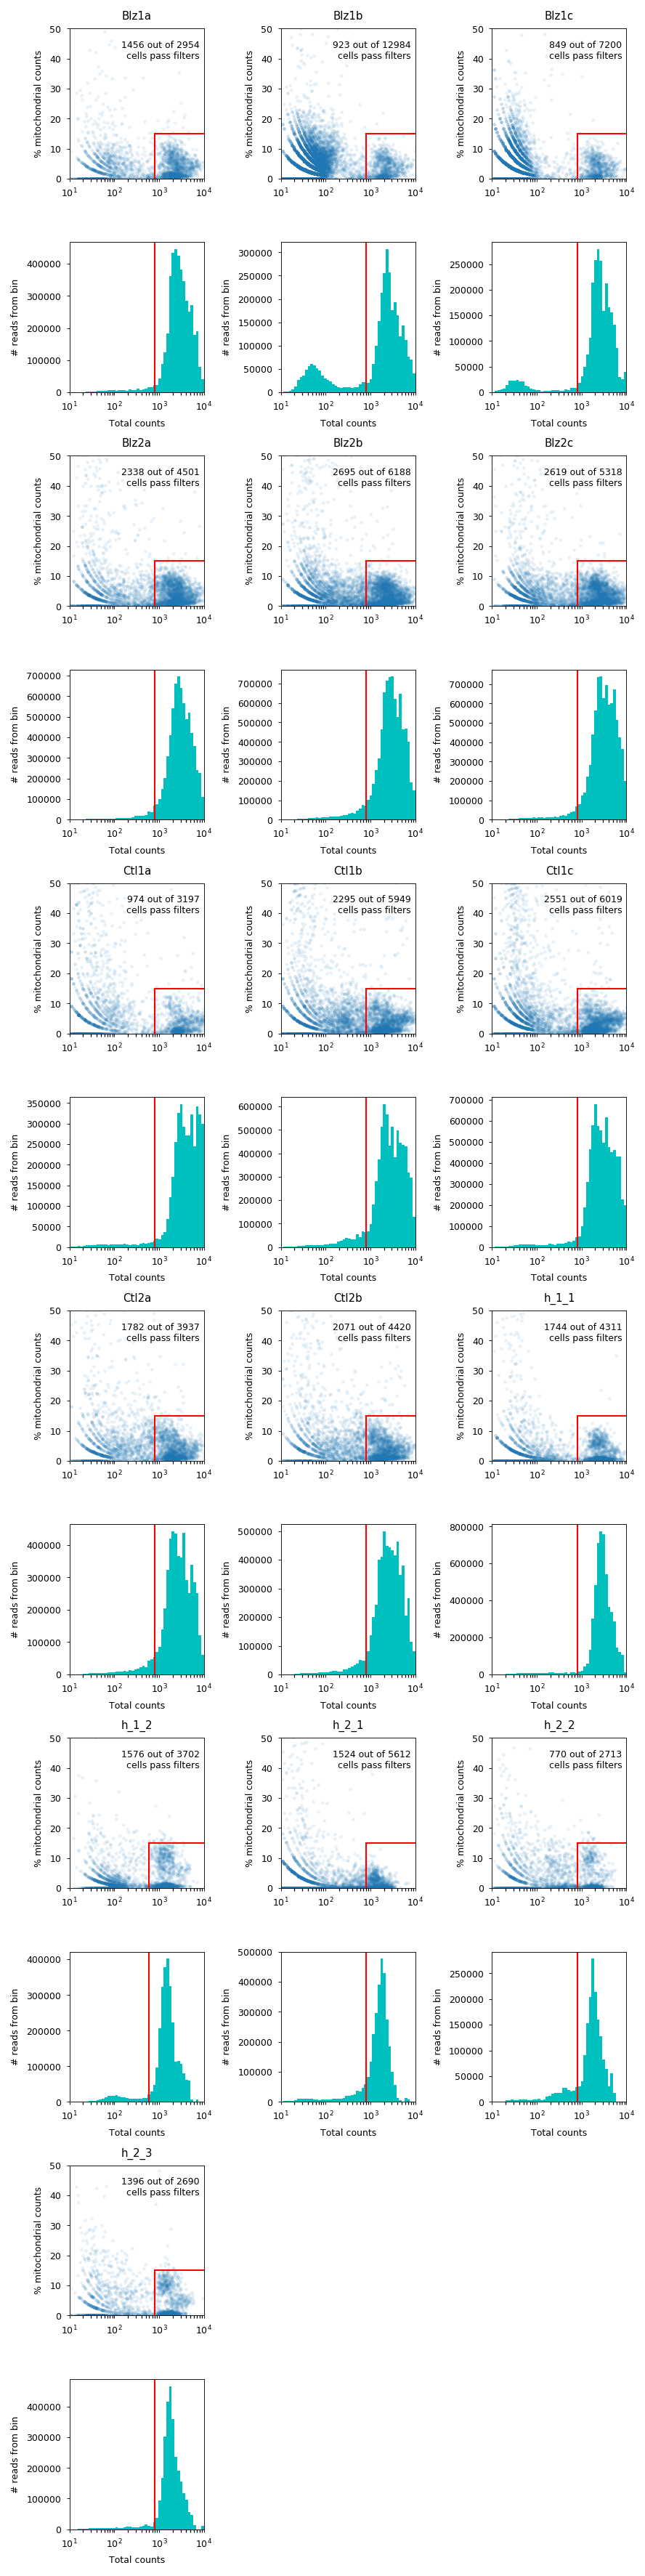

In [20]:
import math
pass_filters = []

#plot mito histograms
nr_rows = math.ceil(len(libs)/3.)

fig,gs = rz.startfig(w=15,h=nr_rows*10,rows=nr_rows*2,columns=3,return_first_ax=False)
#startfig - a custom function by Rapo

#best way I could think of to get all the coordinates of the my subplots
coords = np.argwhere(np.zeros([nr_rows,3]) == 0)

# control total count range to expect
xmin = 10
xmax = 10**4

!mkdir -p outputs

for c,lib in zip(coords,libs):
    
    a = fig.add_subplot(gs[c[0]*2,c[1]])
    a1 = fig.add_subplot(gs[c[0]*2+1,c[1]])

    mask = adata.obs[libcol] == lib
    x = adata.obs.loc[mask,'total_counts']
    y = adata.obs.loc[mask,'pct_counts_mito']
    
    #scatter
    a.scatter(x,y,lw=0,s=5,alpha=0.1,rasterized=True)
    a.set_xscale('log')
    a.set_xlim(xmin,xmax)
    a.set_ylim(0,50)
    a.set_ylabel('% mitochondrial counts')
    a.set_title(lib)
    
    #plot threshold in scatter
    ts = ts_dict[lib]
    a.plot((ts[0],ts[0]),(a.get_ylim()[0],ts[1]),lw=1,color='r')
    a.plot((ts[0],a.get_xlim()[1]),(ts[1],ts[1]),lw=1,color='r')
    pass_ts = (adata.obs.loc[mask,'total_counts']>=ts[0])&(adata.obs.loc[mask,'pct_counts_mito']<ts[1])
    cells_pass = pass_ts.sum()
    cells_all = len(pass_ts)
    a.text(a.get_xlim()[1]*0.8,a.get_ylim()[1]*0.8,
           "%d out of %d\ncells pass filters"%(cells_pass,cells_all),
           ha='right')
    pass_filters+=(list(pass_ts.values))
    
    # histogram
    bins=np.logspace(np.log10(xmin),np.log10(xmax),51)
    hs, bins,patches = plt.hist(x,bins=bins)
    
    #plot barchart
    lefts = bins[:-1]
    rights = bins[1:]
    a1.bar(x = lefts,width = rights-lefts,height = hs*rights,
          align='edge',
          lw=0.,color = 'c')
    a1.set_xscale('log');
    a1.set_xlim(xmin,xmax)
    # threshold:
    a1.plot((ts[0],ts[0]),(a1.get_ylim()[0],a1.set_ylim()[1]),lw=1,color='r')
    a1.set_xlabel('Total counts')
    
    a1.set_ylabel('# reads from bin')
           

print(sum(pass_filters))
gs.tight_layout(fig)
!mkdir -p outputs
plt.savefig('outputs/mito_pct_vs_total_counts.pdf',dpi=300)

### Apply the thesholds (filter data)

In [21]:
cmask = np.repeat(True,adata.shape[0])

for key,value in ts_dict.items():
    m1 = (adata.obs[libcol] == key).values
    tmp = adata.obs[m1]
    m2 = (tmp['total_counts']>=value[0]).values
    m3 = (tmp['pct_counts_mito']<value[1]).values
    cmask[m1] = m2&m3
    
print(cmask.sum(),cmask.shape)

27563 (81695,)


In [22]:
print(adata.shape)
adata = adata[cmask]
print(adata.shape)

(81695, 40930)
(27563, 40930)


## Record in adata.obs any extra per-cell information if available

In [23]:
adata.obs['library'].unique()

array(['Blz1a', 'Blz1b', 'Blz1c', 'Blz2a', 'Blz2b', 'Blz2c', 'Ctl1a',
       'Ctl1b', 'Ctl1c', 'Ctl2a', 'Ctl2b', 'h_1_1', 'h_1_2', 'h_2_1',
       'h_2_2', 'h_2_3'], dtype=object)

In [25]:
'test'.replace('tt','pe')

'test'

In [29]:
# rename libraries
prefix_renamer1 = {
    'Blz':'CSF1Ri_',
    'Ctl':'Vehicle_',
    'h_':'Healthy_'}

suffix_renamer = {
    'a':'_1',
    'b':'_2',
    'c':'_3'
}

# save a copy of library names before renaming
adata.obs['_library_before_renaming'] = adata.obs['library'].copy()
newlibs = adata.obs['library']


newlibs = [i[:-1]+suffix_renamer[i[-1]] if i[-1] in suffix_renamer else i for i in newlibs]

for key,value in prefix_renamer1.items():
    newlibs = [i.replace(key,value) for i in newlibs]

#overwrite
adata.obs['library'] = newlibs

In [31]:
adata.obs.head()

,barcode,library,total_counts,pct_counts_mito,_library_before_renaming
0,bcECPI,CSF1Ri_1_1,14875.0,5.815126,Blz1a
1,bcESAZ,CSF1Ri_1_1,6876.0,4.217568,Blz1a
2,bcIBUV,CSF1Ri_1_1,4643.0,2.864527,Blz1a
3,bcGWNX,CSF1Ri_1_1,5972.0,6.396517,Blz1a
4,bcCOWJ,CSF1Ri_1_1,5021.0,3.823939,Blz1a


In [32]:
adata.obs['mouse'] = [i[:-2] for i in adata.obs['library']]
adata.obs['condition'] = [i[:-2] for i in adata.obs['mouse']]

In [33]:
adata.obs.head()

,barcode,library,total_counts,pct_counts_mito,_library_before_renaming,mouse,condition
0,bcECPI,CSF1Ri_1_1,14875.0,5.815126,Blz1a,CSF1Ri_1,CSF1Ri
1,bcESAZ,CSF1Ri_1_1,6876.0,4.217568,Blz1a,CSF1Ri_1,CSF1Ri
2,bcIBUV,CSF1Ri_1_1,4643.0,2.864527,Blz1a,CSF1Ri_1,CSF1Ri
3,bcGWNX,CSF1Ri_1_1,5972.0,6.396517,Blz1a,CSF1Ri_1,CSF1Ri
4,bcCOWJ,CSF1Ri_1_1,5021.0,3.823939,Blz1a,CSF1Ri_1,CSF1Ri


## Save the adata object

In [34]:
help(rz.save_df)

Help on function save_df in module rz_functions:

save_df(obj, filename)
    # From Adrian Veres for saving and loading pandas dataframes (modified)



In [35]:
# directory
!mkdir -p backups

# write the entire adata.object
start = time.time()
fname1 = 'backups/mito_total_counts_filt_raw_%dx%d_%s.h5ad'%(adata.shape[0],adata.shape[1],rz.now())
print(fname1)
adata.write(fname1)
print(time.time()-start)

# write the pandas dataframe under adata.obs as a separate file
# this part of the AnnData object changes most, is relatively small, and backups are nice
meta = adata.obs
fname2 = 'backups/obs_info_%dx%d_%s'%(meta.shape[0],meta.shape[1],rz.now())
print(fname2)
rz.save_df(meta,fname2)
print(time.time()-start)

backups/mito_total_counts_filt_raw_27563x40930_200517_10h29.h5ad


... storing 'barcode' as categorical
... storing 'library' as categorical
... storing '_library_before_renaming' as categorical
... storing 'mouse' as categorical
... storing 'condition' as categorical


0.9232628345489502
backups/obs_info_27563x7_200517_10h29
1.0419700145721436
